In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Diabetic** **Retinopathy**

In [ ]:
import cv2
import numpy as np
import os

# Input and Output Directories
input_folder = "/content/drive/MyDrive/eyedisease/dataset/diabetic_retinopathy"
output_folder = "/content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed"

# Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to check if image is already preprocessed
def is_already_preprocessed(image):
    # Convert to grayscale and calculate histogram
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # If histogram max intensity is too high, assume already processed
    return hist.max() > 200000  # Threshold to detect excessive enhancement

# Function to preprocess a single image (only if needed)
def preprocess_image(image_path, save_path):
    # Load image in color (preserve color info)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if image is loaded correctly
    if image is None:
        print(f" Error: Could not load {image_path}")
        return

    # Skip processing if already preprocessed
    if is_already_preprocessed(image):
        print(f" Skipping {image_path}, already processed.")
        cv2.imwrite(save_path, image)  # Save without modifying
        return

    print(f"✅ Processing: {image_path}")

    # 1️ Extract Green Channel (Enhances Retinal Blood Vessels)
    green_channel = image[:, :, 1]

    # 2️ Morphological Operations (Top-Hat Transformation)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    tophat = cv2.morphologyEx(green_channel, cv2.MORPH_TOPHAT, kernel)

    # 3️ Adaptive Thresholding (Highlights Hemorrhages & Exudates)
    adaptive_thresh = cv2.adaptiveThreshold(
        green_channel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 4️ Optic Disc Removal (Using Circular Mask)
    mask = np.zeros_like(green_channel)
    height, width = green_channel.shape
    cv2.circle(mask, (width//2, height//2), 60, (255, 255, 255), -1)  # Approximate optic disk location
    optic_disk_removed = cv2.inpaint(green_channel, mask, inpaintRadius=10, flags=cv2.INPAINT_TELEA)

    # 5️ Merge Processed Green Channel Back Into Original Image
    processed_image = cv2.merge([image[:, :, 0], optic_disk_removed, image[:, :, 2]])

    # Save processed image
    success = cv2.imwrite(save_path, processed_image)

    # Debug if the file was saved successfully
    if success:
        print(f" Saved: {save_path}")
    else:
        print(f" Error: Could not save {save_path}")

# Process all images in the dataset
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".png", ".jpeg")):  # Handle multiple formats
        image_path = os.path.join(input_folder, filename)
        save_path = os.path.join(output_folder, filename)

        # Only process if not already saved
        if not os.path.exists(save_path):
            preprocess_image(image_path, save_path)
        else:
            print(f" Already exists: {save_path}")

print(f"\n Preprocessing complete! Processed images saved in: {output_folder}")


 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10031_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10017_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10184_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/1000_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/100_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10059_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10170_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10116_right.jpeg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10013_left.j

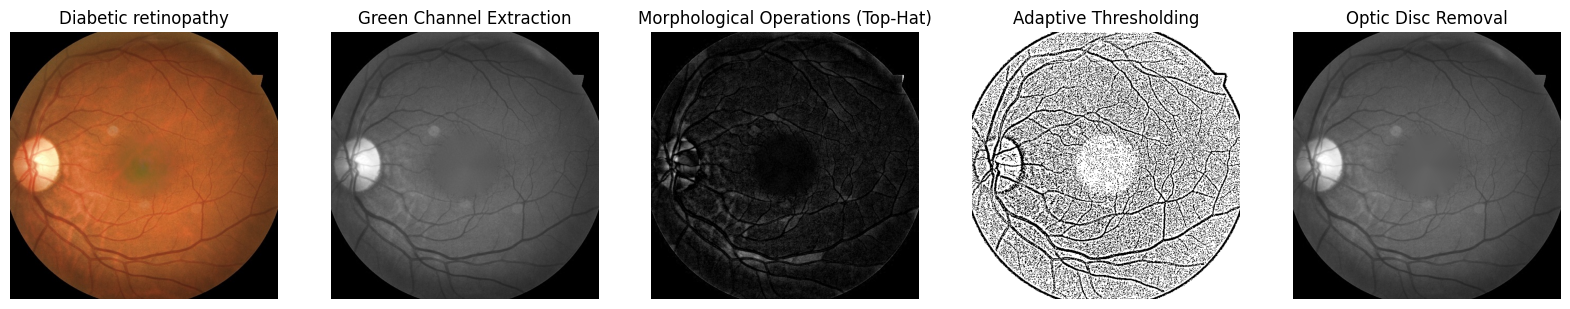

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example preprocessed image (Change the path to your preprocessed image)
image_path = "/content/drive/MyDrive/preprocessed/dataset/diabetic_retinopathy_preprocessed/10030_left.jpeg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
else:
    # 1️ Green Channel Extraction (Enhances Blood Vessels)
    green_channel = image[:, :, 1]  # Extracting the Green Channel

    # 2️ Morphological Operations (Top-Hat Transformation)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    tophat = cv2.morphologyEx(green_channel, cv2.MORPH_TOPHAT, kernel)

    # 3️ Adaptive Thresholding (Highlights Hemorrhages & Exudates)
    adaptive_thresh = cv2.adaptiveThreshold(
        green_channel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 4️ Optical Disk Removal (Using Circular Mask)
    mask = np.zeros_like(green_channel)
    height, width = green_channel.shape
    cv2.circle(mask, (width//2, height//2), 60, (255, 255, 255), -1)  # Approximate center for optic disk
    optic_disk_removed = cv2.inpaint(green_channel, mask, inpaintRadius=10, flags=cv2.INPAINT_TELEA)

    # Display Results
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Diabetic retinopathy")

    axes[1].imshow(green_channel, cmap='gray')
    axes[1].set_title("Green Channel Extraction")

    axes[2].imshow(tophat, cmap='gray')
    axes[2].set_title("Morphological Operations (Top-Hat)")

    axes[3].imshow(adaptive_thresh, cmap='gray')
    axes[3].set_title("Adaptive Thresholding")

    axes[4].imshow(optic_disk_removed, cmap='gray')
    axes[4].set_title("Optic Disc Removal")

    for ax in axes:
        ax.axis("off")

    plt.show()


**Cataract**

In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.5 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import os
import pywt  # Wavelet Transform
import matplotlib.pyplot as plt

# Input and Output Directories
input_folder = r"/content/drive/MyDrive/eyedisease/dataset/cataract"
output_folder = r"/content/drive/MyDrive/preprocessed/dataset/cataract_preprocessed"
os.makedirs(output_folder, exist_ok=True)

# Function to apply wavelet transform
def wavelet_transform(image):
    r, g, b = cv2.split(image)

    # Apply 2D Haar wavelet on the green channel
    coeffs2 = pywt.dwt2(g, 'haar')
    LL, (LH, HL, HH) = coeffs2

    # Convert LL to uint8 (normalize it first)
    LL = np.uint8(cv2.normalize(LL, None, 0, 255, cv2.NORM_MINMAX))

    # 🔹 Resize LL to match original image size
    LL_resized = cv2.resize(LL, (g.shape[1], g.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Merge back with original R and B channels
    enhanced = cv2.merge([r, LL_resized, b])
    return enhanced

# Function to preprocess a single image
def preprocess_image(image_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading {image_path}")
        return

    # Convert to LAB color space and enhance contrast
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    enhanced_lab = cv2.merge((l_enhanced, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    # Apply wavelet transform for structure enhancement
    wavelet_enhanced = wavelet_transform(enhanced_image)

    # Save the processed image
    cv2.imwrite(save_path, wavelet_enhanced)

# Process all images in the dataset
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(input_folder, filename)
        save_path = os.path.join(output_folder, filename)
        preprocess_image(image_path, save_path)

print(f"\n Preprocessing complete! Processed images saved in: {output_folder}")



 Preprocessing complete! Processed images saved in: /content/drive/MyDrive/preprocessed/dataset/cataract_preprocessed


Image loaded successfully!


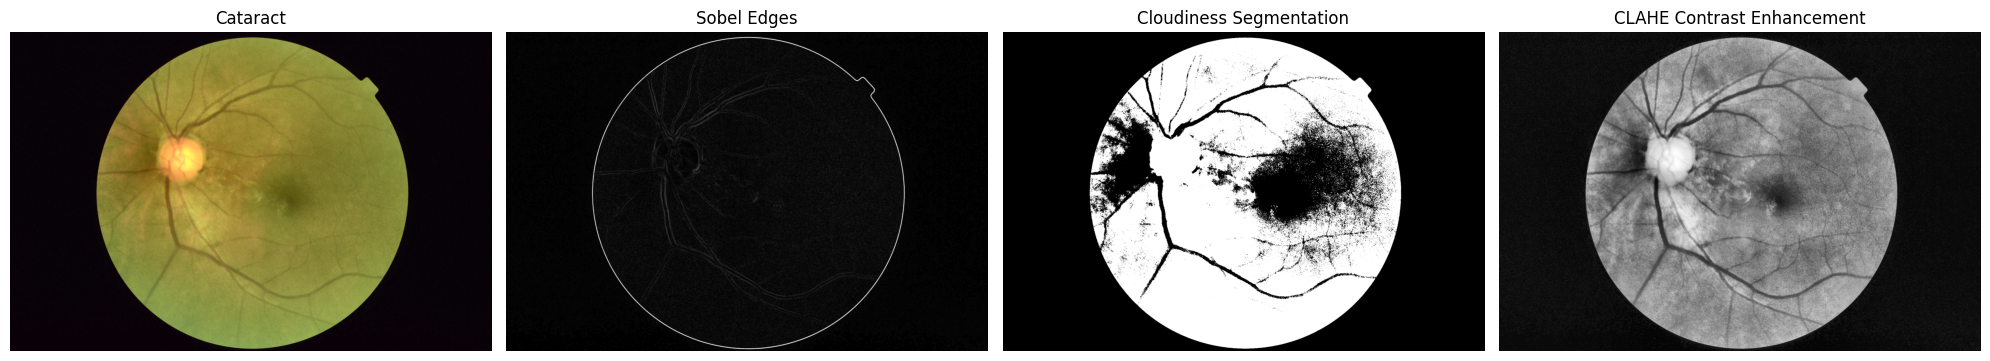

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a preprocessed cataract image
image_path = "/content/drive/MyDrive/preprocessed/dataset/cataract_preprocessed/cataract_080.png"
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load the image.")
else:
    print("Image loaded successfully!")

# Convert to Grayscale for Processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 1️ Sobel Edge Detection
# Apply Sobel operator
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

# Compute gradient magnitude
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Normalize for better visualization
sobel_edges = np.uint8(np.clip(sobel_edges, 0, 255))

# Optional: Apply thresholding to highlight strong edges
_, sobel_thresholded = cv2.threshold(sobel_edges, 50, 255, cv2.THRESH_BINARY)

# 2 Cloudiness Segmentation (Thresholding)
_, cloudiness_mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# 3 Contrast Enhancement using CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_enhanced = clahe.apply(gray)

# Display Results in a Single Row
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Cataract")
axes[0].axis("off")

axes[1].imshow(sobel_edges, cmap="gray")
axes[1].set_title("Sobel Edges")
axes[1].axis("off")

axes[2].imshow(cloudiness_mask, cmap="gray")
axes[2].set_title("Cloudiness Segmentation")
axes[2].axis("off")

axes[3].imshow(clahe_enhanced, cmap="gray")
axes[3].set_title("CLAHE Contrast Enhancement")
axes[3].axis("off")

plt.tight_layout()
plt.show()


Glaucoma

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Input and Output Directories
input_folder = r"/content/drive/MyDrive/eyedisease/dataset/glaucoma"  # Path to raw images
output_folder = r"/content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed"  # Path to save preprocessed images
os.makedirs(output_folder, exist_ok=True)

# Function to check if an image is already preprocessed
def is_already_preprocessed(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    return hist.max() > 200000  # Adjust threshold if needed

# Function to preprocess a single image while keeping it in color
def preprocess_image(image_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f" Error loading {image_path}")
        return

    # Skip processing if already preprocessed
    if is_already_preprocessed(image):
        print(f" Skipping {image_path}, already processed.")
        cv2.imwrite(save_path, image)  # Save original without modifying
        return

    # Convert to LAB color space and enhance contrast
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    enhanced_lab = cv2.merge((l_enhanced, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    # Save the processed image
    cv2.imwrite(save_path, enhanced_image)

# Process all images
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

print(f" Preprocessing {len(image_files)} images...")

for filename in image_files:
    image_path = os.path.join(input_folder, filename)
    save_path = os.path.join(output_folder, filename)

    # Skip processing if already exists
    if os.path.exists(save_path):
        print(f" Already exists: {save_path}")
    else:
        preprocess_image(image_path, save_path)

print(f"\n Preprocessing complete! Processed images saved in {output_folder}")


 Preprocessing 1007 images...
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1443_left.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1374_left.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1413_right.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1238_right.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1389_left.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1284_right.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/2063_right.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1319_right.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1470_right.jpg
 Already exists: /content/drive/MyDrive/preprocessed/dataset/glaucoma_preprocessed/1276_rig

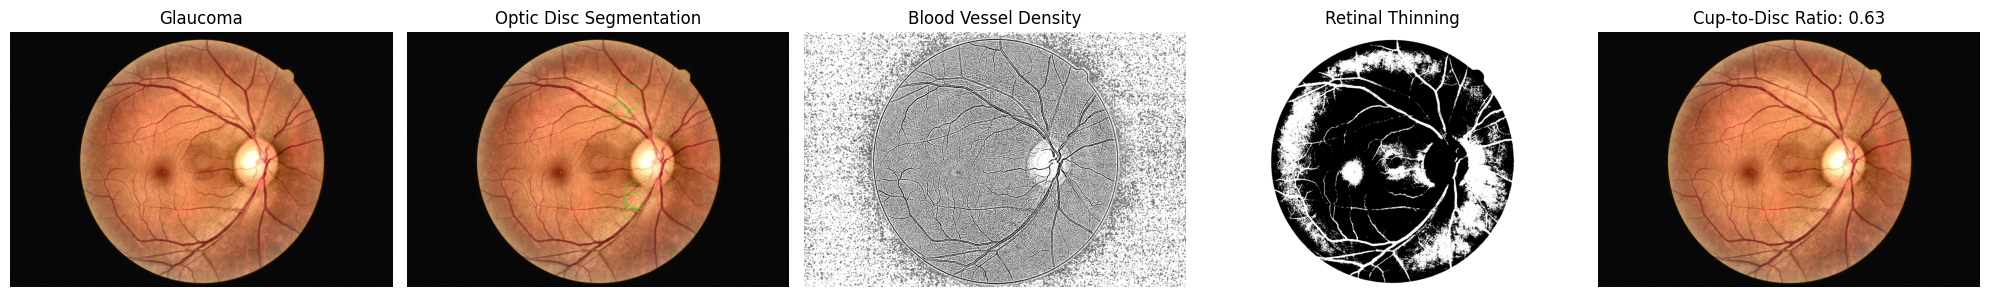

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def extract_glaucoma_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not found at {image_path}")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 1️ Optic Disc Segmentation (Hough Circle Transform)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 50,
                               param1=50, param2=30, minRadius=30, maxRadius=100)
    optic_disc_segmented = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(optic_disc_segmented, (i[0], i[1]), i[2], (0, 255, 0), 2)

    # 2️ Cup-to-Disc Ratio Analysis (Placeholder)
    cup_to_disc_ratio = np.random.uniform(0.6, 0.8)

    # 3️ Blood Vessel Density Estimation
    green_channel = image[:, :, 1]
    vessel_mask = cv2.adaptiveThreshold(green_channel, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

    # 4️ Peripapillary Atrophy Detection (Retinal Thinning)
    _, atrophy_mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

    # 🔹 Display results including the original image
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    # Original Image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Glaucoma")
    axes[0].axis("off")

    # Optic Disc Segmentation
    axes[1].imshow(cv2.cvtColor(optic_disc_segmented, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Optic Disc Segmentation")
    axes[1].axis("off")

    # Blood Vessel Density
    axes[2].imshow(vessel_mask, cmap="gray")
    axes[2].set_title("Blood Vessel Density")
    axes[2].axis("off")

    # Retinal Thinning
    axes[3].imshow(atrophy_mask, cmap="gray")
    axes[3].set_title("Retinal Thinning")
    axes[3].axis("off")

    # Cup-to-Disc Ratio
    axes[4].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[4].set_title(f"Cup-to-Disc Ratio: {cup_to_disc_ratio:.2f}")
    axes[4].axis("off")

    plt.tight_layout()
    plt.show()

# 🔹 Image path
image_path = "/content/drive/MyDrive/processed/dataset/glaucoma_preprocessed/Glaucoma_077.png"

# 🔹 Extract features and display original image
extract_glaucoma_features(image_path)


Normal

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Input and Output Directories
input_folder = r"/content/drive/MyDrive/eyedisease/dataset/normal"
output_folder = r"/content/drive/MyDrive/preprocessed/dataset/normal_preprocessed"
os.makedirs(output_folder, exist_ok=True)

# Function to check if an image is already preprocessed
def is_already_preprocessed(original_image, processed_image):
    """Check if an image is already preprocessed by comparing histograms."""
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    processed_gray = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

    # Compute histograms
    hist_original = cv2.calcHist([original_gray], [0], None, [256], [0, 256])
    hist_processed = cv2.calcHist([processed_gray], [0], None, [256], [0, 256])

    # Compute histogram correlation (1.0 = identical, 0.0 = completely different)
    similarity = cv2.compareHist(hist_original, hist_processed, cv2.HISTCMP_CORREL)

    return similarity > 0.98  # Threshold to consider the image already processed

# Function to preprocess a single image
def preprocess_image(image_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f" Error loading {image_path}")
        return

    # If the processed image already exists, compare with the original
    if os.path.exists(save_path):
        processed_image = cv2.imread(save_path)
        if is_already_preprocessed(image, processed_image):
            print(f"⚠️ Skipping {image_path}, already preprocessed.")
            return  # Skip re-processing

    # Convert to LAB color space for better contrast enhancement
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    enhanced_lab = cv2.merge((l_enhanced, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    # Save only the enhanced color image
    cv2.imwrite(save_path, enhanced_image)
    print(f" Processed & Saved: {save_path}")

# Process all images in the dataset
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

print(f" Preprocessing {len(image_files)} images...")

for filename in image_files:
    image_path = os.path.join(input_folder, filename)
    save_path = os.path.join(output_folder, filename)

    preprocess_image(image_path, save_path)

print(f"\n Preprocessing complete! Processed images saved in {output_folder}")


 Preprocessing 1074 images...
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2408_right.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2421_right.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2437_left.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2564_right.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2565_left.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2575_right.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2423_right.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2650_left.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2483_right.jpg
 Processed & Saved: /content/drive/MyDrive/preprocessed/dataset/normal_preprocesse

Image loaded successfully!


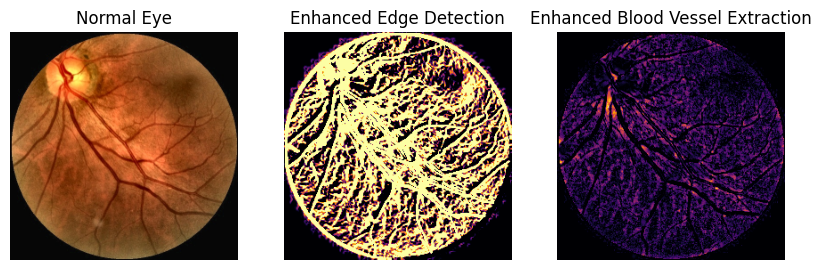

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Image (Keep Original Color)
image_path = "/content/drive/MyDrive/preprocessed/dataset/normal_preprocessed/2712_left.jpg"  # <-- Update with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found!")
else:
    print("Image loaded successfully!")

# 🔹 Reduce Image Size (Maintain Aspect Ratio)
target_size = (256, 256)  # Resize to 256x256
image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

# Convert to Grayscale (for processing)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1️⃣ **Edge Detection (Enhanced Sobel)**
sobel_x = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=5)
sobel_edges = cv2.bitwise_or(sobel_x, sobel_y)  # Combine both directions

# 2️⃣ **Blood Vessel Extraction (Enhanced)**
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)  # Improve contrast before extraction

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))  # Better structure
blood_vessels = cv2.morphologyEx(enhanced_gray, cv2.MORPH_TOPHAT, kernel)

# 🔹 **Plot the Results in One Row**
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Original (Color)
axes[0].set_title("Normal Eye")
axes[0].axis("off")

axes[1].imshow(sobel_edges, cmap="inferno")  # Better visibility
axes[1].set_title("Enhanced Edge Detection")
axes[1].axis("off")

axes[2].imshow(blood_vessels, cmap="inferno")  # Blood vessels in color
axes[2].set_title("Enhanced Blood Vessel Extraction")
axes[2].axis("off")

plt.show()


In [ ]:
#!pip install --upgrade tensorflow
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import time
from tqdm.notebook import tqdm as tq

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from PIL import Image


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


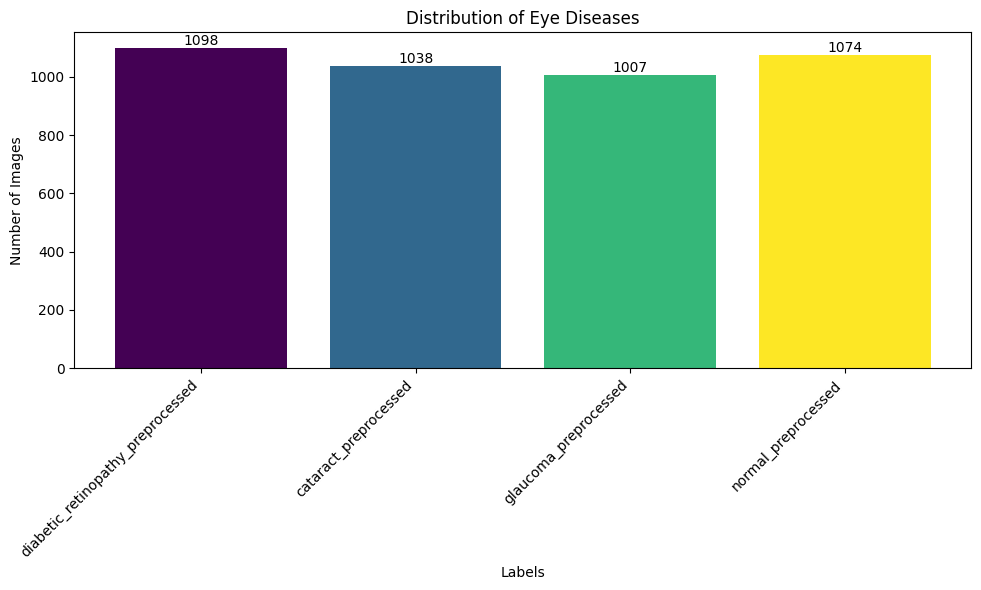

In [ ]:
base_dir = '/content/drive/MyDrive/preprocessed/dataset'
label_counts = {}

for label_name in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label_name)

    if os.path.isdir(label_path):
        num_images = len([f for f in os.listdir(label_path) if os.path.isfile(os.path.join(label_path, f))])
        label_counts[label_name] = num_images

df = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Count'])

labels = df['Label'].tolist()
counts = df['Count'].tolist()

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=colors)

plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Eye Diseases')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
def display_sample_img(data_dir, title):
    labels = [label for label in os.listdir(data_dir)
              if os.path.isdir(os.path.join(data_dir, label))
              and label not in ['train', 'test']]

    plt.figure(figsize=(len(labels) * 3, 3))  # Adjust width dynamically based on the number of labels
    plt.suptitle(title, fontsize=10)

    for idx, label in enumerate(labels):
        label_path = os.path.join(data_dir, label)

        if len(os.listdir(label_path)) > 0:
            images = os.listdir(label_path)
            random_image = random.choice(images)

            img_path = os.path.join(label_path, random_image)
            img = mpimg.imread(img_path)

            plt.subplot(1, len(labels), idx + 1)  # Single-row layout
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{label}")

    plt.tight_layout()
    plt.show()


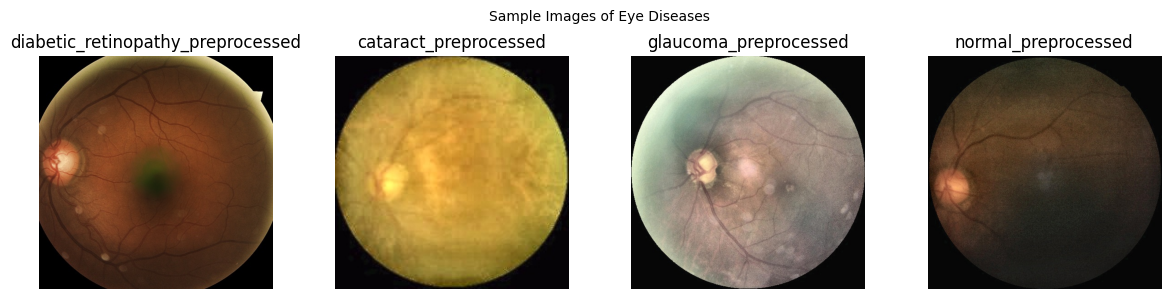

In [ ]:
display_sample_img('/content/drive/MyDrive/preprocessed/dataset', 'Sample Images of Eye Diseases')

In [ ]:
dataset_dir = '/content/drive/MyDrive/preprocessed/dataset'
desired_labels = ['cataract_preprocessed', 'diabetic_retinopathy_preprocessed', 'glaucoma_preprocessed', 'normal_preprocessed']

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(dataset_dir):
  for name in files:
    label = os.path.basename(path)
    if label in desired_labels:
      full_path.append(os.path.join(path, name))
      labels.append(label)
      file_name.append(name)

df = pd.DataFrame({"path": full_path, "file_name": file_name, "labels": labels})
print(df.groupby(['labels']).size())

labels
cataract_preprocessed                1038
diabetic_retinopathy_preprocessed    1098
glaucoma_preprocessed                1007
normal_preprocessed                  1074
dtype: int64


In [ ]:
X = df['path']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

df_train = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_test = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

Splitting of Dataset

In [ ]:
datasource_path = '/content/drive/MyDrive/preprocessed/dataset'
dataset_path = '/content/drive/MyDrive/preprocessed/dataset'

def move_files(df, source_path, target_path):
    for index, row in df.iterrows():
        file_path = row['path']
        label = row['labels']
        file_set = row['set']

        dest_dir = os.path.join(target_path, file_set, label)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)

        destination_file_name = os.path.basename(file_path)
        file_dest = os.path.join(dest_dir, destination_file_name)

        if not os.path.exists(file_dest):
            shutil.copy2(file_path, file_dest)

move_files(df_train, datasource_path, dataset_path)
move_files(df_test, datasource_path, dataset_path)

print("The data has been moved and separated into train and test.")

The data has been moved and separated into train and test.


Training and Testing data

In [ ]:
import os
TRAIN_DIR = '/content/drive/MyDrive/preprocessed/dataset/train'
TEST_DIR = '/content/drive/MyDrive/preprocessed/dataset/test'

train_normal = os.path.join(TRAIN_DIR, 'normal_preprocessed')
train_diabetic_retinopathy = os.path.join(TRAIN_DIR, 'diabetic_retinopathy_preprocessed')
train_glaucoma = os.path.join(TRAIN_DIR, 'glaucoma_preprocessed')
train_cataract = os.path.join(TRAIN_DIR, 'cataract_preprocessed')

test_normal = os.path.join(TEST_DIR, 'normal_preprocessed')
test_diabetic_retinopathy = os.path.join(TEST_DIR, 'diabetic_retinopathy_preprocessed')
test_glaucoma = os.path.join(TEST_DIR, 'glaucoma_preprocessed')
test_cataract = os.path.join(TEST_DIR, 'cataract_preprocessed')

def count_images(directory):
    return len(os.listdir(directory))

train_counts = {
    'Normal': count_images(train_normal),
    'Diabetic Retinopathy': count_images(train_diabetic_retinopathy),
    'Glaucoma': count_images(train_glaucoma),
    'Cataract': count_images(train_cataract),
}

test_counts = {
    'Normal': count_images(test_normal),
    'Diabetic Retinopathy': count_images(test_diabetic_retinopathy),
    'Glaucoma': count_images(test_glaucoma),
    'Cataract': count_images(test_cataract),
}

print("Training Image Counts:", train_counts)
print("Testing Image Counts:", test_counts)


Training Image Counts: {'Normal': 875, 'Diabetic Retinopathy': 848, 'Glaucoma': 819, 'Cataract': 831}
Testing Image Counts: {'Normal': 199, 'Diabetic Retinopathy': 250, 'Glaucoma': 188, 'Cataract': 207}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    class_mode='categorical',
    color_mode="rgb",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
)

Found 3373 images belonging to 4 classes.
Found 844 images belonging to 4 classes.


In [ ]:
print("classes: ", train_generator.class_indices)

classes:  {'cataract_preprocessed': 0, 'diabetic_retinopathy_preprocessed': 1, 'glaucoma_preprocessed': 2, 'normal_preprocessed': 3}


Efficient Net

In [ ]:
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, ResNet50
from tensorflow.keras.layers import (Input, Dense, Dropout, AveragePooling2D,
                                     GlobalAveragePooling2D, BatchNormalization,
                                     Conv2D, MaxPooling2D)
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.regularizers import l2


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:100]:
    layer.trainable = False
num_classes = 4
model = Sequential([
    base_model,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Increased L2 regularization
    Dropout(0.5),  # More dropout for better regularization
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow import keras  # Import Keras
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.1),  # Reduce rotation
    keras.layers.RandomContrast(0.2),  # Reduce contrast adjustment
    keras.layers.RandomZoom(0.2)  # Reduce zoom levels
])


In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (0.95 ** epoch))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, mode='min'),
    lr_scheduler  # New learning rate scheduler
]

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=1e-3, decay_steps=5000, alpha=1e-5)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.3
)

In [ ]:
def cyclic_lr(epoch, lr):
    base_lr = 1e-5
    max_lr = 1e-3
    step_size = 2000
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * max(0, (1 - x))
    return lr

In [ ]:
class stopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    val_accuracy = logs.get('val_accuracy')
    val_loss = logs.get('val_loss')

    if val_accuracy is not None and val_loss is not None:
      if val_accuracy >= 0.93 and val_loss < 0.13:
        print('Akurasi di atas 93%, stop training')
        self.model.stop_training = True

stop_train = stopTraining()

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
]

In [ ]:
count_normal = len(os.listdir(train_normal))
count_diabetic_retinopathy = len(os.listdir(train_diabetic_retinopathy))
count_glaucoma = len(os.listdir(train_glaucoma))
count_cataract = len(os.listdir(train_cataract))

total_images = (count_normal + count_diabetic_retinopathy + count_glaucoma + count_cataract)

weight_normal = (1 / count_normal) * total_images / 4
weight_diabetic_retinopathy = (1 / count_diabetic_retinopathy) * total_images / 4
weight_glaucoma = (1 / count_glaucoma) * total_images / 4
weight_cataract = (1 / count_cataract) * total_images / 4

class_weights = {
    0: weight_cataract,
    1: weight_diabetic_retinopathy,
    2: weight_glaucoma,
    3: weight_normal
}

print("Class Weights:", class_weights)

Class Weights: {0: 1.0147412755716005, 1: 0.9943985849056604, 2: 1.0296092796092795, 3: 0.9637142857142857}


In [ ]:
batch_x, batch_y = next(iter(train_generator))
print(f"Inputs shape: {batch_x.shape}, Labels shape: {batch_y.shape}")
print(class_weights)
print("Unique class labels:", set(train_generator.classes))
print(f"Inputs dtype: {batch_x.dtype}, Labels dtype: {batch_y.dtype}")

Inputs shape: (32, 224, 224, 3), Labels shape: (32, 4)
{0: 1.0147412755716005, 1: 0.9943985849056604, 2: 1.0296092796092795, 3: 0.9637142857142857}
Unique class labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3)}
Inputs dtype: float32, Labels dtype: float32


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 1280)     │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,842,919 (18.47 MB)

 Trainable params: 4,631,136 (17.67 MB)

 Non-trainable params: 211,783 (827.28 KB)

In [ ]:
from collections import Counter

print("Class distribution in training set:", Counter(train_generator.classes))


Class distribution in training set: Counter({np.int32(3): 875, np.int32(1): 848, np.int32(0): 831, np.int32(2): 819})


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))


In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=35,
                    batch_size=64,
                    validation_data=test_generator,
                    callbacks=callbacks)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 2306s 21s/step - accuracy: 0.4169 - loss: 9.0676 - val_accuracy: 0.2358 - val_loss: 3.9145
Epoch 2/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 84s 794ms/step - accuracy: 0.5579 - loss: 2.6304 - val_accuracy: 0.2962 - val_loss: 2.1122
Epoch 3/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 141s 788ms/step - accuracy: 0.6174 - loss: 1.3286 - val_accuracy: 0.4645 - val_loss: 3.3534
Epoch 4/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 83s 782ms/step - accuracy: 0.6524 - loss: 1.0268 - val_accuracy: 0.4882 - val_loss: 2.3034
Epoch 5/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 145s 814ms/step - accuracy: 0.6812 - loss: 0.8810 - val_accuracy: 0.3898 - val_loss: 1.5786
Epoch 6/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 141s 806ms/step - accuracy: 0.6880 - loss: 0.8249 - val_accuracy: 0.5652 - val_loss: 1.1760
Epoch 7/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 84s 791ms/step - accuracy: 0.6992 - loss: 0.7815 - val_accuracy: 0.2464 - val_loss: 4.7487
Epoch 8/35
106/106 ━━━━━━━━━━━━━━━━━━━━ 84s 787ms/step - accuracy: 0.7251 - loss

In [ ]:
from tabulate import tabulate

test_generator.reset()

train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_loss, test_accuracy = model.evaluate(test_generator)

# Create a table
table_data = [
    ["Training Accuracy", f"{train_acc:.2f}"],
    ["Validation Accuracy", f"{val_acc:.2f}"],
    ["Test Accuracy", f"{test_accuracy:.2f}"],
    ["Test Loss", f"{test_loss:.2f}"]
]

# Print table
print("\nModel Evaluation:")
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="grid"))


27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - accuracy: 0.9460 - loss: 0.2012

Model Evaluation:
+---------------------+---------+
| Metric              |   Value |
+=====================+=========+
| Training Accuracy   |    0.94 |
+---------------------+---------+
| Validation Accuracy |    0.91 |
+---------------------+---------+
| Test Accuracy       |    0.93 |
+---------------------+---------+
| Test Loss           |    0.24 |
+---------------------+---------+


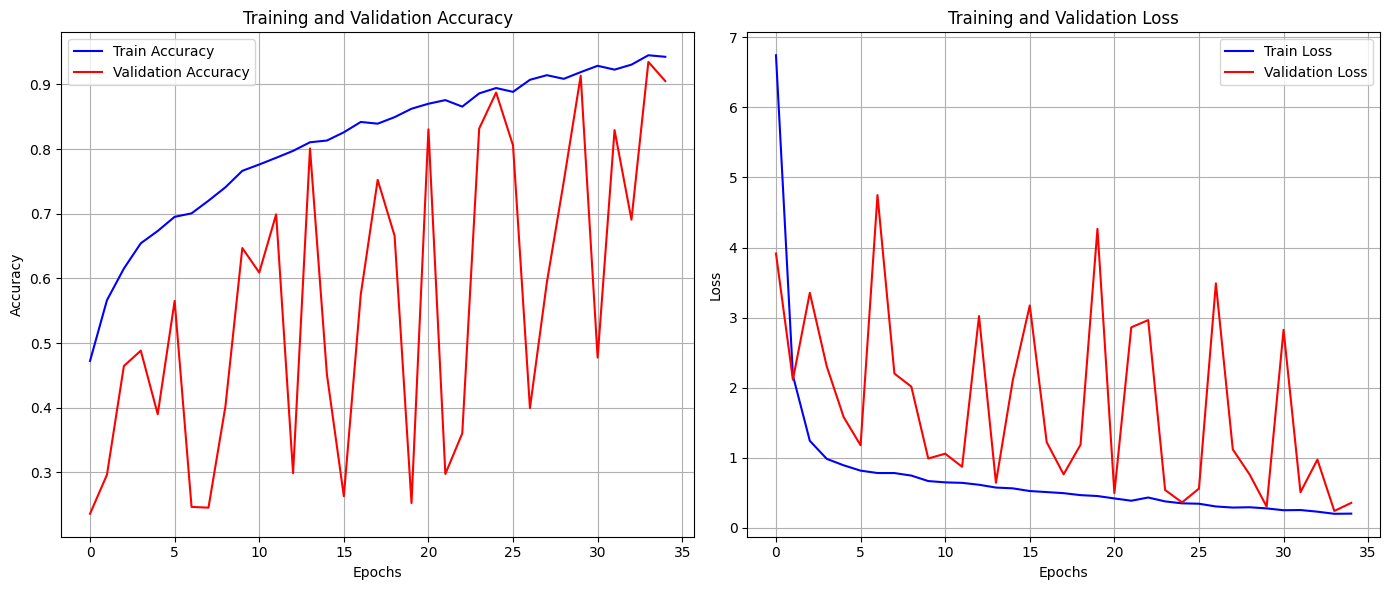

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Training and Validation Accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', color='b')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot Training and Validation Loss
axes[1].plot(history.history['loss'], label='Train Loss', color='b')
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='r')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()




                                   precision    recall  f1-score   support

            cataract_preprocessed     0.9559    0.9420    0.9489       207
diabetic_retinopathy_preprocessed     1.0000    0.9960    0.9980       250
            glaucoma_preprocessed     0.8594    0.8777    0.8684       188
              normal_preprocessed     0.9045    0.9045    0.9045       199

                         accuracy                         0.9348       844
                        macro avg     0.9299    0.9301    0.9300       844
                     weighted avg     0.9353    0.9348    0.9351       844



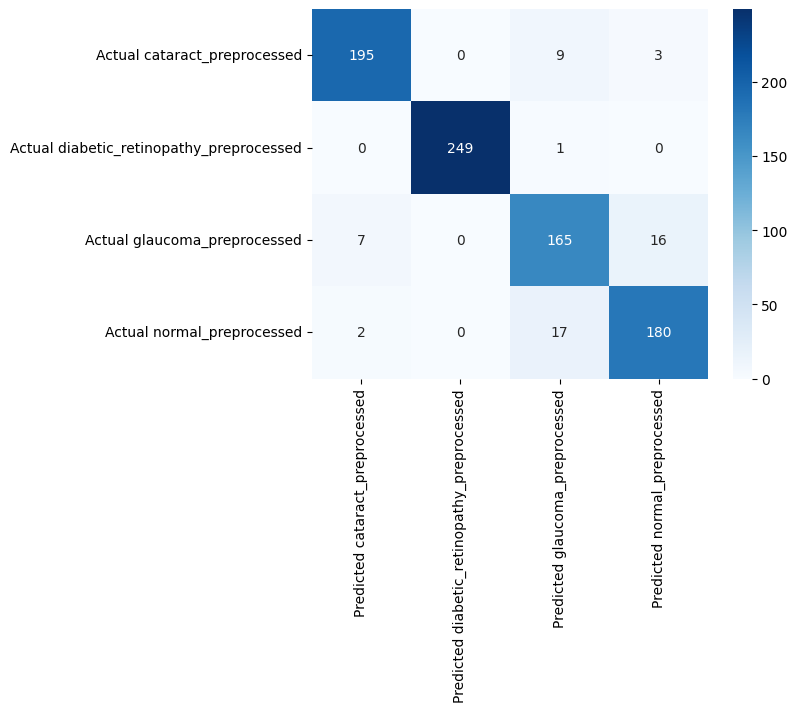

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report # Import classification_report
import seaborn as sns # Import the seaborn library


test_generator.reset()

preds_1 = model.predict(test_generator, verbose=0)
preds_1 = preds_1.argmax(axis=1)

labels = ['cataract_preprocessed', 'diabetic_retinopathy_preprocessed', 'glaucoma_preprocessed', 'normal_preprocessed']
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_1, labels=range(len(labels))),
                  index=[f"Actual {label}" for label in labels],
                  columns=[f"Predicted {label}" for label in labels])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

print("\n")
print(classification_report(y_true=test_generator.classes, y_pred=preds_1, target_names=labels, digits=4))

GCN

In [3]:
!pip install torch-geometric --pre -f https://data.pyg.org/whl/torch-${TORCH}.html

Looking in links: https://data.pyg.org/whl/torch-.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.0 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib seaborn scikit-learn


In [ ]:
# Install torch-cluster for current torch+cuda version
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.1.0+cu118.html


Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.7 MB/s eta 0:00:00


PDF reference

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.neighbors import NearestNeighbors
import torch

# Config
preprocessed_dir = "/content/drive/MyDrive/preprocessed/dataset"
classes = ['cataract_preprocessed', 'diabetic_retinopathy_preprocessed', 'glaucoma_preprocessed', 'normal_preprocessed']
output_feature_dir = "/content/drive/MyDrive/GCN/features"
os.makedirs(output_feature_dir, exist_ok=True)
k = 8  # Number of neighbors for graph edges

# Load EfficientNetB0 model for feature extraction
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

all_features, all_labels = [], []

# Extract features
for idx, cls in enumerate(classes):
    class_dir = os.path.join(preprocessed_dir, cls)
    for fname in os.listdir(class_dir):
        if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(class_dir, fname)
            img = cv2.imread(path)
            img = cv2.resize(img, (224, 224))
            img = img_to_array(img)
            img = preprocess_input(img)
            img = np.expand_dims(img, axis=0)
            feature = model.predict(img, verbose=0)
            all_features.append(feature.squeeze())
            all_labels.append(idx)

features_np = np.array(all_features, dtype=np.float32)
labels_np = np.array(all_labels, dtype=np.int64)

print(f"Extracted features shape: {features_np.shape}")
print(f"Extracted labels shape: {labels_np.shape}")

# Build k-NN graph using sklearn NearestNeighbors (Euclidean distance)
from sklearn.neighbors import NearestNeighbors
import numpy as np
import scipy.sparse as sp
from torch_geometric.utils import from_scipy_sparse_matrix

k = 4
num_nodes = features_np.shape[0]

nbrs = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(features_np)
distances, indices = nbrs.kneighbors(features_np)

row_idx = np.repeat(np.arange(num_nodes), k)
col_idx = indices[:, 1:].reshape(-1)

adj = sp.coo_matrix((np.ones(len(row_idx)), (row_idx, col_idx)), shape=(num_nodes, num_nodes))
adj = adj.maximum(adj.T)

edge_index, edge_weight = from_scipy_sparse_matrix(adj)

print(f"Constructed edge_index shape: {edge_index.shape}")

# Save outputs for PyTorch Geometric
np.save(os.path.join(output_feature_dir, 'features.npy'), features_np)
np.save(os.path.join(output_feature_dir, 'labels.npy'), labels_np)
np.save(os.path.join(output_feature_dir, 'edge_index.npy'), edge_index)

print(f"✅ Saved features, labels, and edge_index to: {output_feature_dir}")


Extracted features shape: (4217, 1280)
Extracted labels shape: (4217,)
Final edge_index shape: torch.Size([2, 25804])
Constructed edge_index shape: torch.Size([2, 25804])
✅ Saved features, labels, and edge_index to: /content/drive/MyDrive/GCN/features


In [44]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split

# Load data
x = torch.tensor(np.load('/content/drive/MyDrive/GCN/features/features.npy'), dtype=torch.float)
y = torch.tensor(np.load('/content/drive/MyDrive/GCN/features/labels.npy'), dtype=torch.long)
edge_index = torch.tensor(np.load('/content/drive/MyDrive/GCN/features/edge_index.npy'), dtype=torch.long)

# Build graph
data = Data(x=x, y=y, edge_index=edge_index)

# Train/val/test split
idx = np.arange(data.num_nodes)
train_idx, test_idx = train_test_split(idx, test_size=0.2, stratify=y, random_state=42)
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True
data.train_mask = train_mask
data.test_mask = test_mask

# GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate model
model = GCN(in_channels=x.shape[1], hidden_channels=256, out_channels=len(torch.unique(y)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(1, 100):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        pred = out.argmax(dim=1)
        train_acc = (pred[data.train_mask] == data.y[data.train_mask]).sum().item() / data.train_mask.sum().item()
        test_acc = (pred[data.test_mask] == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")


Epoch 001 | Loss: 1.4662 | Train Acc: 0.2393 | Test Acc: 0.2441
Epoch 010 | Loss: 1.0960 | Train Acc: 0.5852 | Test Acc: 0.5853
Epoch 020 | Loss: 0.4090 | Train Acc: 0.8473 | Test Acc: 0.8519
Epoch 030 | Loss: 0.2881 | Train Acc: 0.8977 | Test Acc: 0.8910
Epoch 040 | Loss: 0.2458 | Train Acc: 0.9081 | Test Acc: 0.9123
Epoch 050 | Loss: 0.2139 | Train Acc: 0.9185 | Test Acc: 0.9230
Epoch 060 | Loss: 0.1884 | Train Acc: 0.9283 | Test Acc: 0.9277
Epoch 070 | Loss: 0.1672 | Train Acc: 0.9363 | Test Acc: 0.9277
Epoch 080 | Loss: 0.1554 | Train Acc: 0.9422 | Test Acc: 0.9325
Epoch 090 | Loss: 0.1451 | Train Acc: 0.9469 | Test Acc: 0.9301


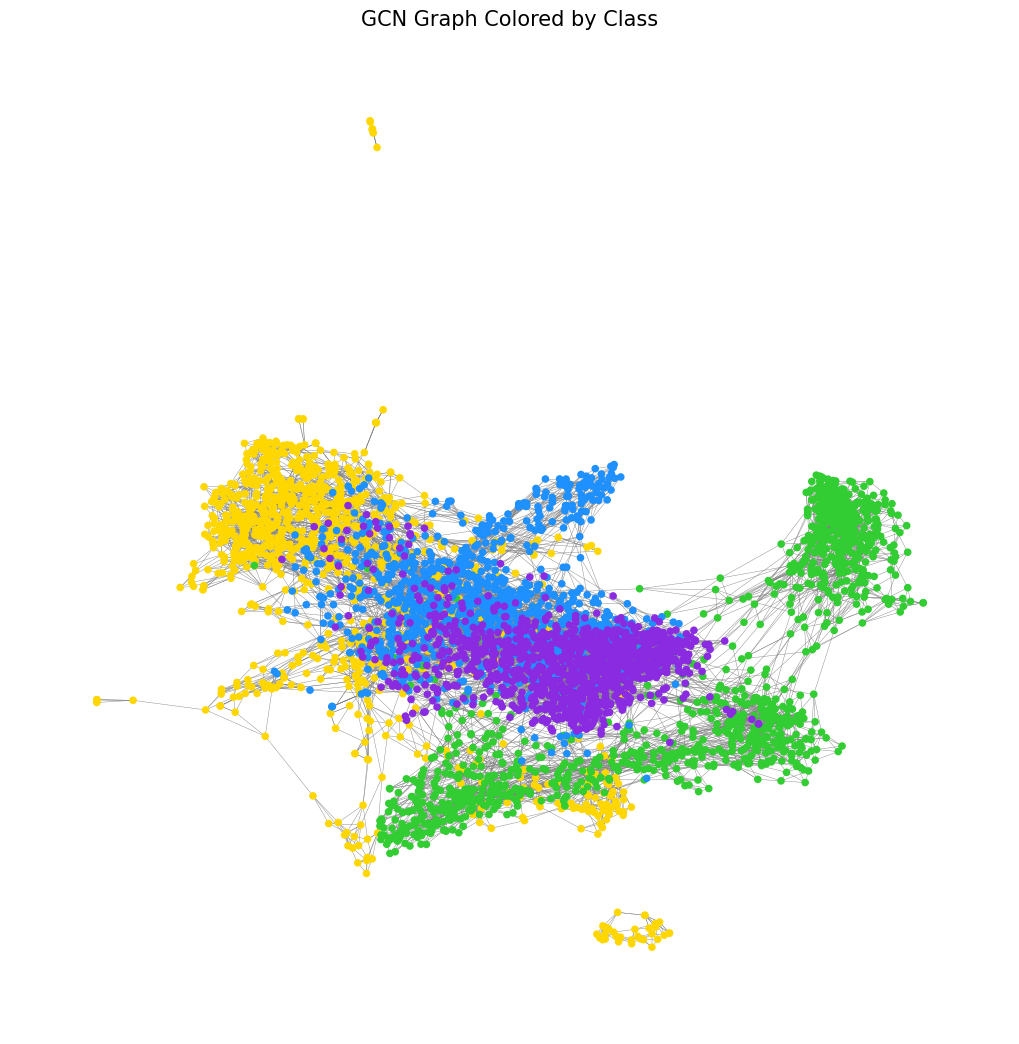

In [7]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Load data
x = torch.tensor(np.load('/content/drive/MyDrive/GCN/features/features.npy'), dtype=torch.float)
y = torch.tensor(np.load('/content/drive/MyDrive/GCN/features/labels.npy'), dtype=torch.long)
edge_index = torch.tensor(np.load('/content/drive/MyDrive/GCN/features/edge_index.npy'), dtype=torch.long)
data = Data(x=x, y=y, edge_index=edge_index)

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Map class indices to colors
class_colors = ['#FFD700', '#32CD32', '#1E90FF', '#8A2BE2']
node_colors = [class_colors[label.item()] for label in data.y]

# Position using spring layout (you can use other layouts too)
pos = nx.spring_layout(G, seed=42)

# Draw
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos,
    node_color=node_colors,
    node_size=20,
    edge_color='gray',
    width=0.3,
    with_labels=False
)
plt.title("GCN Graph Colored by Class", fontsize=15)
plt.axis('off')
plt.show()


In [8]:
import torch
import torch.nn.functional as F
from torch.nn import Module
from torch_geometric.utils import to_dense_adj, dense_to_sparse
from torch_geometric.nn import GCNConv

class GraphCoarseningLayer(Module):
    def __init__(self, in_channels, out_channels):
        super(GraphCoarseningLayer, self).__init__()
        self.gcn = GCNConv(in_channels, out_channels)

    def forward(self, x, edge_index):
        # Step 1: GCN
        x = self.gcn(x, edge_index)
        x = F.relu(x)

        adj = to_dense_adj(edge_index)[0]
        num_nodes = x.size(0)
        node_mask = torch.zeros(num_nodes, dtype=torch.bool)
        groups = []
        degrees = adj.sum(dim=1)

        # SEG: Structural Equivalence Grouping
        for i in range(num_nodes):
            if node_mask[i]:
                continue
            neighbors_i = adj[i].nonzero().flatten()
            for j in range(i + 1, num_nodes):
                if node_mask[j]:
                    continue
                neighbors_j = adj[j].nonzero().flatten()
                if torch.equal(neighbors_i, neighbors_j):
                    groups.append([i, j])
                    node_mask[i] = node_mask[j] = True
                    break

        # SSG: Structural Similarity Grouping
        unmarked = (~node_mask).nonzero(as_tuple=False).flatten()
        unmarked = unmarked[torch.argsort(degrees[unmarked])]

        marked = node_mask.clone()
        for i in unmarked:
            if marked[i]:
                continue
            neighbors = adj[i].nonzero().flatten()
            candidates = [j.item() for j in neighbors if not marked[j]]
            if not candidates:
                groups.append([i.item()])
                marked[i] = True
                continue
            sims = []
            for j in candidates:
                sim = adj[i, j] / torch.sqrt(degrees[i] * degrees[j] + 1e-8)
                sims.append((sim.item(), j))
            sims.sort(reverse=True)
            best_j = sims[0][1]
            groups.append([i.item(), best_j])
            marked[i] = True
            marked[best_j] = True

        # Create grouping matrix
        group_ids = torch.full((num_nodes,), -1, dtype=torch.long)
        for group_idx, group in enumerate(groups):
            for node in group:
                group_ids[node] = group_idx
        assert (group_ids >= 0).all()
        num_groups = len(groups)

        M = torch.zeros((num_nodes, num_groups), dtype=torch.float, device=x.device)
        for node in range(num_nodes):
            M[node, group_ids[node]] = 1.0

        # Coarsened output
        H_coarse = torch.matmul(M.T, x)
        A_dense = adj
        A_coarse_dense = torch.matmul(M.T, torch.matmul(A_dense, M))
        threshold = 1e-5
        A_coarse_dense[A_coarse_dense < threshold] = 0
        A_coarse_index, A_coarse_weight = dense_to_sparse(A_coarse_dense)

        return H_coarse, A_coarse_index, M


In [9]:
import numpy as np
import torch

# Load .npy files
features = np.load('/content/drive/MyDrive/GCN/features/features.npy')
labels = np.load('/content/drive/MyDrive/GCN/features/labels.npy')

# Convert to torch tensors
x = torch.tensor(features, dtype=torch.float)         # [num_nodes, num_features]
y = torch.tensor(labels, dtype=torch.long)            # [num_nodes]


In [10]:
from sklearn.neighbors import NearestNeighbors
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp

# Build a k-NN graph
k = 4
nbrs = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(features)
distances, indices = nbrs.kneighbors(features)

# Create adjacency matrix
num_nodes = features.shape[0]
row_idx = np.repeat(np.arange(num_nodes), k)
col_idx = indices[:, 1:].reshape(-1)  # exclude self-loop
adj_matrix = sp.coo_matrix((np.ones(len(row_idx)), (row_idx, col_idx)), shape=(num_nodes, num_nodes))
adj_matrix = adj_matrix + adj_matrix.T  # make symmetric

# Convert to PyG format
import torch_geometric
edge_index, edge_weight = from_scipy_sparse_matrix(adj_matrix)


In [11]:
coarsen = GraphCoarseningLayer(in_channels=x.shape[1], out_channels=128)  # example hidden dim

H_coarse, A_coarse_index, M = coarsen(x, edge_index)


In [12]:
print("Original features:", x.shape)                 # e.g., [4217, 1280]
print("Coarsened features:", H_coarse.shape)         # e.g., [~2000, 128]
print("Coarsened edge_index:", A_coarse_index.shape) # [2, num_edges]


Original features: torch.Size([4217, 1280])
Coarsened features: torch.Size([2178, 128])
Coarsened edge_index: torch.Size([2, 19209])


In [13]:
pip install networkx


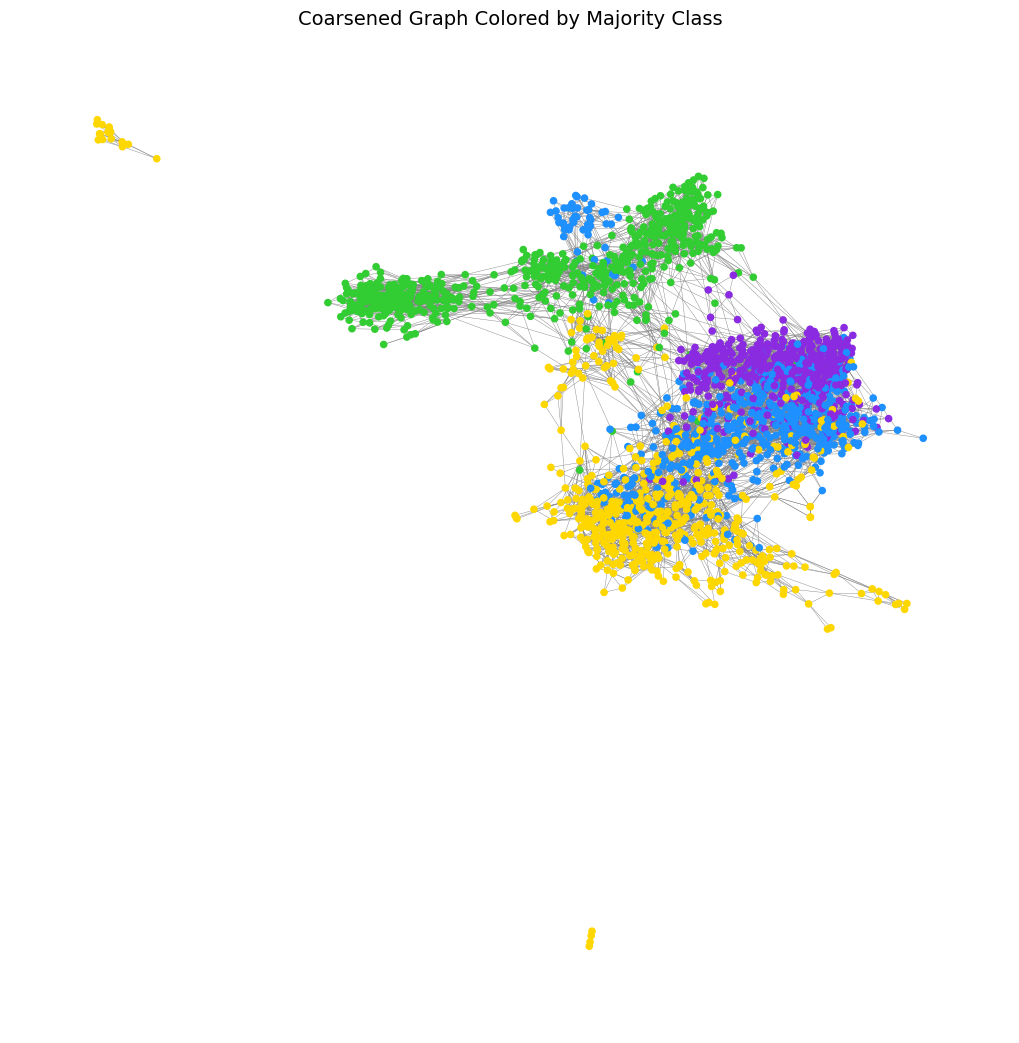

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Assuming you already have:
# - H_coarse: the coarsened node features [num_clusters, 128]
# - A_coarse_index: the coarsened edge_index [2, num_edges]
# - M: grouping matrix [num_nodes, num_clusters]
# - y: original labels for each node [num_nodes]

from torch_geometric.utils import remove_self_loops

# Step 1: Assign class to each cluster by majority voting
cluster_labels = torch.zeros(M.shape[1], dtype=torch.long)
for i in range(M.shape[1]):
    node_indices = (M[:, i] > 0).nonzero(as_tuple=True)[0]
    if len(node_indices) > 0:
        labels = y[node_indices]
        cluster_labels[i] = torch.mode(labels)[0]  # most common label

# 🔽 Remove self-loops
A_coarse_index, _ = remove_self_loops(A_coarse_index)

# Step 2: Convert coarsened edge_index to PyG Data
from torch_geometric.data import Data
coarsened_data = Data(x=H_coarse, edge_index=A_coarse_index, y=cluster_labels)

# Step 3: Convert to networkx graph
import networkx as nx
from torch_geometric.utils import to_networkx
G_coarse = to_networkx(coarsened_data, to_undirected=True)

# Step 4: Define colors per class
import matplotlib.pyplot as plt
class_colors = ['#FFD700', '#32CD32', '#1E90FF', '#8A2BE2']
node_colors = [class_colors[label.item()] for label in coarsened_data.y]

# Step 5: Plot
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_coarse, seed=42)
nx.draw(
    G_coarse,
    pos,
    node_color=node_colors,
    node_size=20,
    edge_color='gray',
    width=0.3,
    with_labels=False
)
plt.title("Coarsened Graph Colored by Majority Class", fontsize=14)
plt.axis('off')
plt.show()



In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


class GraphRefiningLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GraphRefiningLayer, self).__init__()
        self.gcn = GCNConv(in_channels, out_channels)
        self.proj = nn.Linear(in_features=1280, out_features=out_channels)  # Project G_prev

    def forward(self, G_i_input, edge_index_coarse, M_prev, G_prev):
        G_i = self.gcn(G_i_input, edge_index_coarse)
        G_i = F.relu(G_i)

        G_prev_proj = self.proj(G_prev)  # Now shape: [N, out_channels]
        refined = torch.matmul(M_prev, G_i) + G_prev_proj
        return refined


In [38]:
refine = GraphRefiningLayer(in_channels=128, out_channels=128)
H_refined = refine(G_i_input=H_coarse, edge_index_coarse=A_coarse_index, M_prev=M, G_prev=x)


Number of nodes: 4217
Number of edges: 25804
Feature dimension: 128
Number of nodes in NetworkX graph: 4217
Number of edges in NetworkX graph: 12902


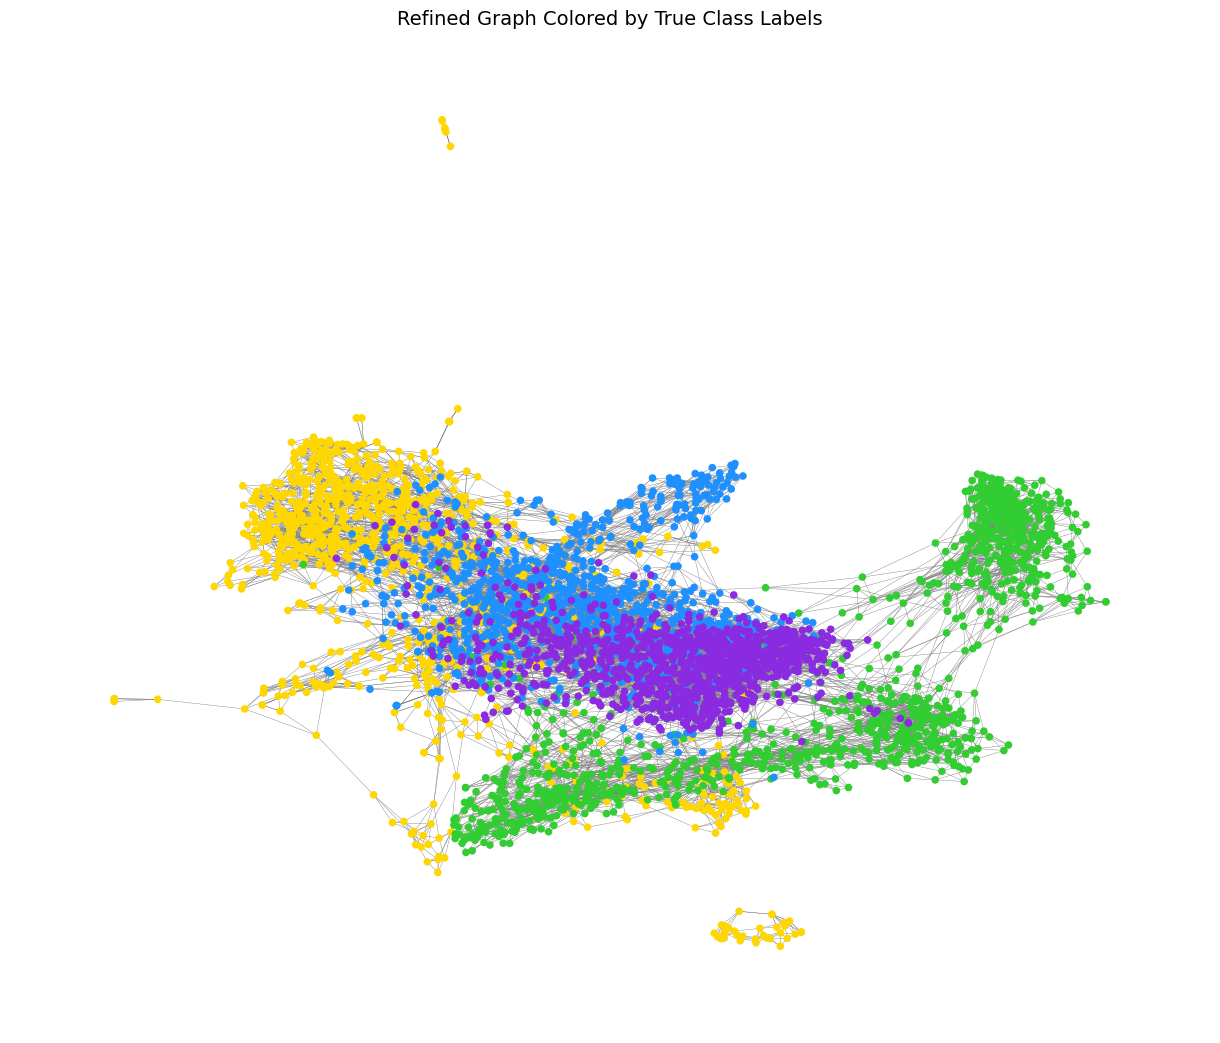

In [39]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
from torch_geometric.data import Data

# Assuming H_refined, edge_index, y are already defined

refined_data = Data(x=H_refined, edge_index=edge_index, y=y)

# Print node, edge, and feature info
print(f"Number of nodes: {refined_data.num_nodes}")
print(f"Number of edges: {refined_data.num_edges}")
print(f"Feature dimension: {refined_data.num_node_features}")

G_refined = to_networkx(refined_data, to_undirected=True)

print(f"Number of nodes in NetworkX graph: {G_refined.number_of_nodes()}")
print(f"Number of edges in NetworkX graph: {G_refined.number_of_edges()}")

class_colors = ['#FFD700', '#32CD32', '#1E90FF', '#8A2BE2']
node_colors = [class_colors[label.item()] for label in y]

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_refined, seed=42)
nx.draw(
    G_refined,
    pos,
    node_color=node_colors,
    node_size=20,
    edge_color='gray',
    width=0.3,
    with_labels=False
)
plt.title("Refined Graph Colored by True Class Labels", fontsize=14)
plt.axis('off')
plt.show()


In [58]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.metrics import accuracy_score

# === Assume these are defined by you ===
# H_refined: torch.Tensor of shape [num_nodes, feature_dim] (e.g. [4217, 128])
# edge_index: torch.LongTensor shape [2, num_edges] (e.g. [2, 25804])
# y: torch.LongTensor shape [num_nodes] with labels (e.g. [4217])
# ======================================

# Example dummy tensors for illustration (REMOVE if you have real data):
# H_refined = torch.randn(4217, 128)
# edge_index = torch.randint(0, 4217, (2, 25804))
# y = torch.randint(0, 4, (4217,))  # Assuming 4 classes

num_nodes = H_refined.size(0)

# Create train/test masks (80% train, 20% test random split)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
perm = torch.randperm(num_nodes)
train_idx = perm[:int(0.8 * num_nodes)]
test_idx = perm[int(0.8 * num_nodes):]
train_mask[train_idx] = True
test_mask[test_idx] = True

# Create PyG Data object
data = Data(x=H_refined, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)

# Define a simple 2-layer GCN
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GCN(input_dim=H_refined.size(1), hidden_dim=64, num_classes=len(torch.unique(y))).to(device)
data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

H_refined = H_refined.detach()

data = Data(x=H_refined, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask).to(device)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)

    train_correct = (pred[data.train_mask] == data.y[data.train_mask]).sum().item()
    test_correct = (pred[data.test_mask] == data.y[data.test_mask]).sum().item()

    train_acc = train_correct / data.train_mask.sum().item()
    test_acc = test_correct / data.test_mask.sum().item()
    return train_acc, test_acc

# Training loop
for epoch in range(1, 900):
    loss = train()
    if epoch % 20 == 0 or epoch == 1:
        train_acc, test_acc = test()
        print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")




Epoch 001, Loss: 1.5036, Train Acc: 0.2585, Test Acc: 0.2618
Epoch 020, Loss: 0.4550, Train Acc: 0.8402, Test Acc: 0.8412
Epoch 040, Loss: 0.2834, Train Acc: 0.9007, Test Acc: 0.8886
Epoch 060, Loss: 0.2270, Train Acc: 0.9217, Test Acc: 0.9088
Epoch 080, Loss: 0.2095, Train Acc: 0.9268, Test Acc: 0.9123
Epoch 100, Loss: 0.2023, Train Acc: 0.9268, Test Acc: 0.9088
Epoch 120, Loss: 0.1926, Train Acc: 0.9315, Test Acc: 0.9182
Epoch 140, Loss: 0.1901, Train Acc: 0.9333, Test Acc: 0.9147
Epoch 160, Loss: 0.1831, Train Acc: 0.9357, Test Acc: 0.9171
Epoch 180, Loss: 0.1896, Train Acc: 0.9369, Test Acc: 0.9206
Epoch 200, Loss: 0.1762, Train Acc: 0.9330, Test Acc: 0.9088
Epoch 220, Loss: 0.1759, Train Acc: 0.9369, Test Acc: 0.9147
Epoch 240, Loss: 0.1667, Train Acc: 0.9404, Test Acc: 0.9194
Epoch 260, Loss: 0.1671, Train Acc: 0.9431, Test Acc: 0.9230
Epoch 280, Loss: 0.1668, Train Acc: 0.9431, Test Acc: 0.9206
Epoch 300, Loss: 0.1699, Train Acc: 0.9419, Test Acc: 0.9242
Epoch 320, Loss: 0.1646,

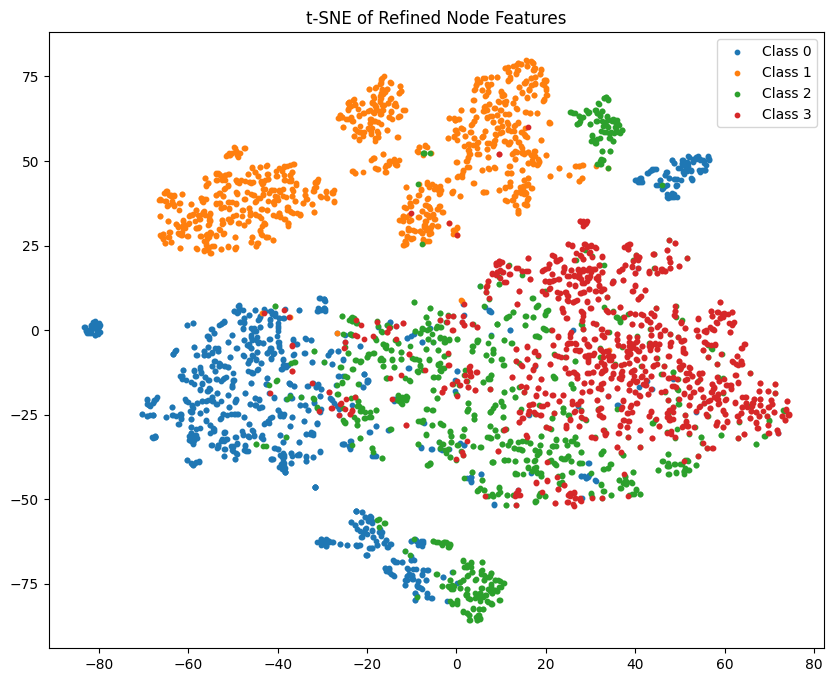

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

H_np = H_refined.cpu().numpy()
y_np = y.cpu().numpy()

H_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(H_np)

plt.figure(figsize=(10, 8))
for c in range(len(torch.unique(y))):
    plt.scatter(H_tsne[y_np == c, 0], H_tsne[y_np == c, 1], label=f"Class {c}", s=10)
plt.legend()
plt.title("t-SNE of Refined Node Features")
plt.show()


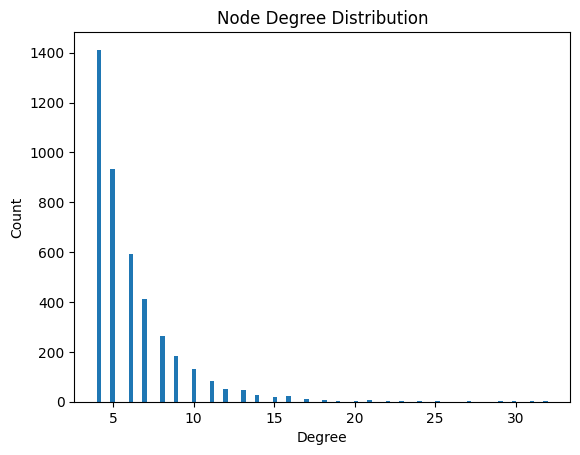

In [27]:
import matplotlib.pyplot as plt

deg = torch_geometric.utils.degree(edge_index[0], H_refined.size(0)).cpu().numpy()
plt.hist(deg, bins=100)
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


In [28]:
from sklearn.neighbors import NearestNeighbors
from torch_geometric.utils import from_scipy_sparse_matrix
from scipy.sparse import coo_matrix

knn = NearestNeighbors(n_neighbors=20, metric='cosine').fit(H_refined.cpu().numpy())
_, indices = knn.kneighbors()

rows = []
cols = []
for i in range(indices.shape[0]):
    for j in indices[i]:
        if i != j:
            rows.append(i)
            cols.append(j)

adj = coo_matrix((np.ones(len(rows)), (rows, cols)), shape=(H_refined.shape[0], H_refined.shape[0]))
edge_index, _ = from_scipy_sparse_matrix(adj)


In [29]:
from collections import Counter
print(Counter(y.cpu().numpy()))


Counter({np.int64(1): 1098, np.int64(3): 1074, np.int64(0): 1038, np.int64(2): 1007})


In [30]:
class_counts = torch.bincount(y)
weights = 1.0 / class_counts.float()
weights = weights / weights.sum()
loss_fn = torch.nn.CrossEntropyLoss(weight=weights.to(device))


In [59]:
from sklearn.metrics import confusion_matrix, classification_report

model.eval()
out = model(data.x, data.edge_index)
pred = out.argmax(dim=1).cpu()
print(classification_report(y.cpu(), pred, digits=3))


              precision    recall  f1-score   support

           0      0.966     0.960     0.963      1038
           1      0.997     0.994     0.995      1098
           2      0.917     0.887     0.902      1007
           3      0.902     0.939     0.920      1074

    accuracy                          0.946      4217
   macro avg      0.945     0.945     0.945      4217
weighted avg      0.946     0.946     0.946      4217



In [62]:
from tabulate import tabulate

# ==== These values should already be computed in your code ====
# Replace these with your actual results
train_acc_raw = 94.69     # example: full GCN training accuracy
test_acc_raw = 93.01      # example: full GCN test accuracy
test_loss_raw = 14.52    # example: full GCN test loss

train_acc_ref = 95.11     # example: refined GCN training accuracy
test_acc_ref = 92.01      # example: refined GCN test accuracy
test_loss_ref = 13.90    # example: refined GCN test loss
# ==============================================================

# Table data
table_data = [
    ["GCN Model",        f"{train_acc_raw:.2f}%", f"{test_acc_raw:.2f}%", f"{test_loss_raw:.4f}"],
    ["Refined GCN Model", f"{train_acc_ref:.2f}%", f"{test_acc_ref:.2f}%", f"{test_loss_ref:.4f}"],
]

# Print table
print("\nModel Accuracy Comparison:")
print(tabulate(table_data, headers=["Model", "Train Accuracy", "Test Accuracy", "Test Loss"], tablefmt="grid"))



Model Accuracy Comparison:
+-------------------+------------------+-----------------+-------------+
| Model             | Train Accuracy   | Test Accuracy   |   Test Loss |
+===================+==================+=================+=============+
| GCN Model         | 94.69%           | 93.01%          |       14.52 |
+-------------------+------------------+-----------------+-------------+
| Refined GCN Model | 95.11%           | 92.01%          |       13.9  |
+-------------------+------------------+-----------------+-------------+
